# **Lab 7: Optimization and learning**
**Kristoffer Almroth**

# **Abstract**

Seventh lab in the course DD2363 Methods in Scientific Computing. This lab is about Optimization and learning.

# **Set up environment**

Dependencies needed for running the code.

In [0]:
from google.colab import files
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

One important aspect in optimization is to find local and global minimums. A local minimum is described as $\exists \epsilon > 0$, $f(\hat{x}) \leq f(x) \space \space \forall x \space \space ||x-\hat{x}|| < \epsilon$. We will focus on finding a local minimum where the search space $D = \mathbb{R}^N$, called an unconstrained minimization problem.

The method for solving this problem will be gradient descent, where the next step will be in the direction where the gradient is the steepest. $x^{(k+1)} = x^{(k)} - \alpha^{(k)} \bigtriangledown f(x^{(k)})$. The stopping criteria is the following: $||\bigtriangledown f(x^{(k)})|| < TOL$

In Newton's method, the stepping criteria is instead $x^{(k+1)} = x^{(k)} + \triangle x^{(k)}$, where we get $\triangle x^{(k)}$ by solving the following equation: $Hf(x^{(k)}) \triangle x^{(k)} = -\bigtriangledown f(x^{(k)})$ with the Hessian matrix $H_{i,j} = \frac{\delta ^2 f}{\delta x_i \delta x_j}$

Source: Lecture notes

For calculating the gradient and the Hessian matrix, [central differences](https://www.mathematik.uni-dortmund.de/~kuzmin/cfdintro/lecture4.pdf) are used: 

$\bigtriangledown f(x) = \frac{f(x+\triangle x) - f(x-\triangle x)}{2  \triangle x} $

$H_{i,j} = \frac{f(x+\triangle x_i + \triangle x _j) - f(x+\triangle x_i - \triangle x _j) - f(x - \triangle x_i + \triangle x _j) + f(x - \triangle x_i - \triangle x _j)}{4 \triangle x_i \triangle x_j}$

# **Methods**

###Gradient descent method in $\mathbb{R}^N$ ###

The gradient descent method is using a constant step size $\alpha = 0.0001$ which is not the fastest method but still gives the expected result in regards to the precision specified by $TOL$

In [0]:
def gradient(f, x):
  h = 1e-5
  x_res = np.zeros(x.size)
  for i in range(x.size):
    x_plus = x.copy()
    x_plus[i] += h
    x_minus = x.copy()
    x_minus[i] -= h
    x_res[i] = (f(x_plus) - f(x_minus)) / (2*h)
  
  return x_res

def GradientDescent(f, x0, TOL):
  
  alpha = 1e-4
  x = []
  x.append(x0)
  Df = gradient(f, x[-1])

  while np.linalg.norm(Df) > TOL:
    Df = gradient(f, x[-1])
    x.append(x[-1] - alpha * Df)
  
  return x

### Newton's method in $\mathbb{R}^N$ ###

In [0]:
def  hessian(f, x):
  h = 1e-5
  N = x.size
  H = np.zeros(shape=(N,N))
  for i in range(N):
    for j in range(N):
      x_plusplus = x.copy()
      x_plusplus[i] += h
      x_plusplus[j] += h
      x_plusminus = x.copy()
      x_plusminus[i] += h
      x_plusminus[j] -= h
      x_minusplus = x.copy()
      x_minusplus[i] -= h
      x_minusplus[j] += h
      x_minusminus = x.copy()
      x_minusminus[i] -= h
      x_minusminus[j] -= h

      H[i,j] = (f(x_plusplus) - f(x_plusminus) - f(x_minusplus) + f(x_minusminus)) / (4*h*h) 

  return H

def newtonsMethodForGradientDescent(f, x0, TOL):
  x = []
  x.append(x0)
  Df = gradient(f, x[-1])

  while np.linalg.norm(Df) > TOL:
    Df = gradient(f, x[-1])
    Hf = hessian(f, x[-1])
    dx = np.linalg.solve(Hf, -Df)
    x.append(x[-1] + dx)
  
  return x  

# **Results**

The method $3(x_1-0.3)^2+2.5(x_2-0.6)^2 + 0.1$ with global minimum at $[0.3, 0.6]$ is used to test the method. The initial guess $x_0 = [0.5, 0.5]$ and the precision $TOL = 0.00001$

In [0]:
f = lambda x : 3*(x[0]-0.3)**2 + 2.5*(x[1]-0.6)**2 + 0.1
x0 = np.array([0.5, 0.5])
TOL = 1e-5
x_grads = GradientDescent(f, x0, TOL)
x_newtons = newtonsMethodForGradientDescent(f, x0, TOL)

We begin by plotting the function as a wireframe, the found minimum for gradient descent as a red dot and the minimum for Newton's method as a slightly smaller green dot, to make both dots visible at the same time. As we can see in the figure below, both the dots are at the minimum point. Notice that the dots appears below the function, when it should be on top of it. This is due to a [bug](https://stackoverflow.com/questions/31506361/grid-zorder-seems-not-to-take-effect-matplotlib) in matplotlib, where it ignores the zorder of the different plots and always plots one over the other. The reason for plotting using a wireframe is to still be able to see the dots, even though the wireframe is drawn over it.

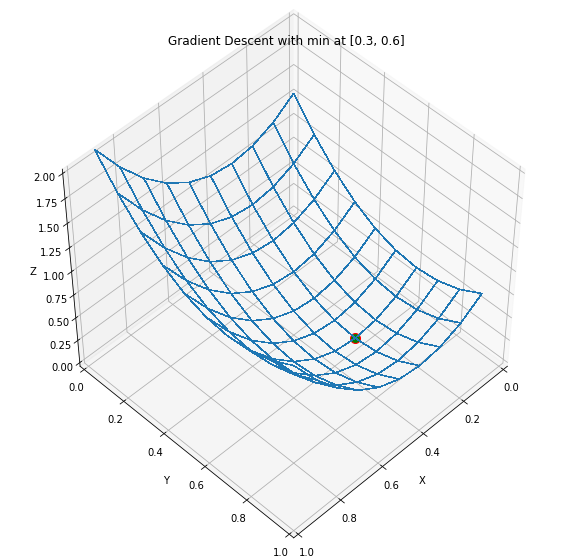

In [41]:
x_grad = x_grads[-1]
x_newton = x_newtons[-1]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0,1.0,0.1)
y = np.arange(0,1.0,0.1)
X,Y = np.meshgrid(x, y)
Z = f([X, Y])
ax.plot_wireframe(X, Y, Z, linewidth=.5, zorder=-1, antialiased=False)
ax.scatter(x_grad[0], x_grad[1], f([x_grad[0], x_grad[1]]), zdir='z', zorder=2.7, s=100, c='r', depthshade=True)
ax.scatter(x_newton[0], x_newton[1], f([x_newton[0], x_newton[1]]), zdir='z', zorder=2.8, s=60, c='g', depthshade=True)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(azim=45, elev=50)
ax.set_title('Gradient Descent with min at [0.3, 0.6]')

plt.show() 

When plotting the error convergence, we can see that the error converges towards 0 but in significantly different speeds. Newton's method is much faster at converging, when compared to the method with a constant stepsize $\alpha$. The starting point of [0.5, 0.5] makes Newton's method converge in only two iterations. In a real world usage, the starting guess is likely not that close to the minimum, but Newton's method should still converge way faster. 

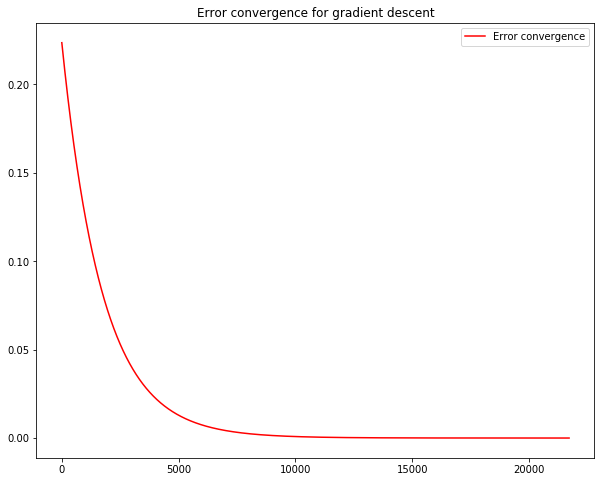

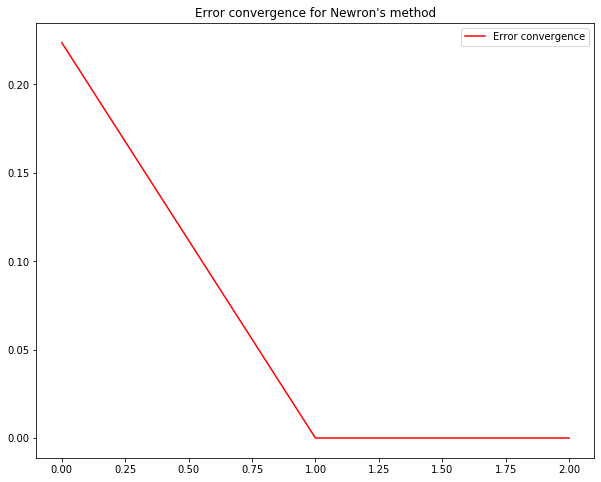

In [40]:
x_min = np.array([0.3,0.6])
N1 = len(x_grads)
error_grad = np.zeros(N1)
for i in range(N1):
  error_grad[i] = np.linalg.norm(x_grads[i] - x_min)

N2 = len(x_newtons)
error_newton = np.zeros(N2)
for i in range(N2):
  error_newton[i] = np.linalg.norm(x_newtons[i] - x_min)

plt.figure(figsize=(10,8))
plt.title("Error convergence for gradient descent")
plt.plot(error_grad, "-r", label="Error convergence")
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(10,8))
plt.title("Error convergence for Newron's method")
plt.plot(error_newton, "-r", label="Error convergence")
plt.legend(loc="upper right")
plt.show()

# **Discussion**

Minimization problems is something we have done before in calculus, so it was interesting to take another approach to it, one that is numerical instead. One problem I had was to overcome matplotlib and understand why the solution point did not appear in the plot. I also had some problems with the gradient function,since I first wanted to use numpy.gradient but it took input agruments on another form than I expected, so I wrote my own using central difference instead.

Another interesting aspect with the lab was to compare a constant stepsize of the gradeint descent method to Newton's method that takes the second order dericative in consideration when calculating the stepsize. The difference was big between the convergence of the two methods.